# Manufacturing Costs

The purpose of this project is to develop a predictive model that estimates **Manufacturing Cost** based on the **Number of Units Produced** using both linear and polynomial regression techniques. 

#### Dataset

The dataset contains two columns:

- **Number_of_Units**: Production volume.
- **Manufacturing_Cost**: Corresponding manufacturing cost.

Statistics:

- Number of Instances: 1,000.
- Average Number of Units: ~4.47.
- Average Manufacturing Cost: ~40.05.

### 1. Import Libraries

In [1]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### 2. Load Data

In [2]:
# Load the CSV file
csv_file_name = 'EconomiesOfScale.csv'

if os.path.exists(csv_file_name):
    df = pd.read_csv(csv_file_name)
    print("\nDataset Loaded Successfully!")
else:
    raise FileNotFoundError(f"Error: {csv_file_name} not found. Please ensure the file is in the correct directory.")

# Preview the dataset
print("\nDataset Preview:")
df.head()


Dataset Loaded Successfully!

Dataset Preview:


,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [3]:
# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())


Missing Values Summary:
Number of Units       0
Manufacturing Cost    0
dtype: int64


### 3. Exploratory Data Analysis

Let's get an overview of the dataset to understand its distribution and the relationships between the features and target.


Dataset Statistics:
       Number_of_Units  Manufacturing_Cost
count      1000.000000         1000.000000
mean          4.472799           40.052999
std           1.336241           10.595322
min           1.000000           20.000000
25%           3.594214           32.912036
50%           4.435958           38.345781
75%           5.324780           44.531822
max          10.000000          100.000000


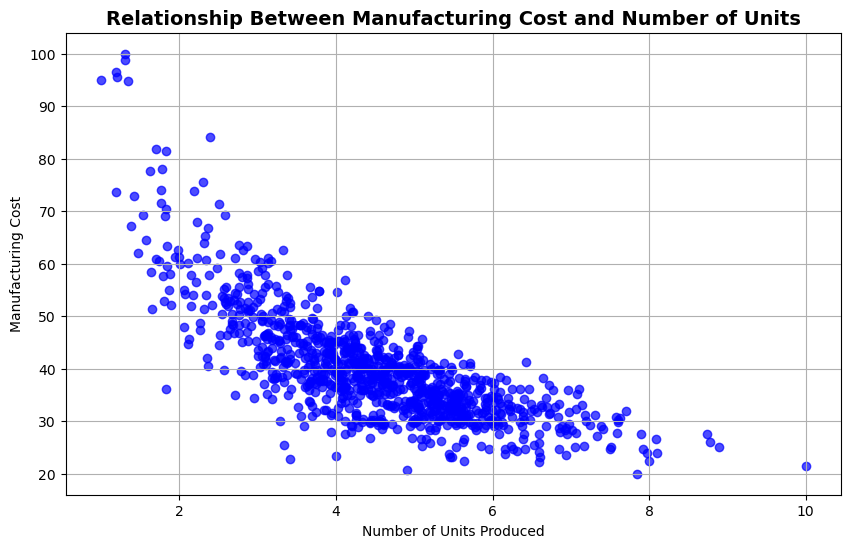

In [4]:
# Rename columns for easier access (if necessary)
df.columns = ['Number_of_Units', 'Manufacturing_Cost']

# Basic statistics
print("\nDataset Statistics:")
print(df.describe())

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Number_of_Units'], df['Manufacturing_Cost'], alpha=0.7, color='blue')
plt.title('Relationship Between Manufacturing Cost and Number of Units', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Manufacturing Cost')
plt.grid(True)
plt.show()

### 4. Model Building and Evaluation

#### **1. Relationship between production volume and manufacturing cost (Linear vs Non-Linear)**

The scatter plot shows the relationship between the number of units produced and manufacturing costs.


Training and Test Set Sizes:
Training set: (800, 1), Test set: (200, 1)

Linear Model Evaluation Metrics:
Mean Absolute Error (MAE): 4.513943834797746
Mean Squared Error (MSE): 35.19738891578312
R-Squared (R²): 0.5695897011831417


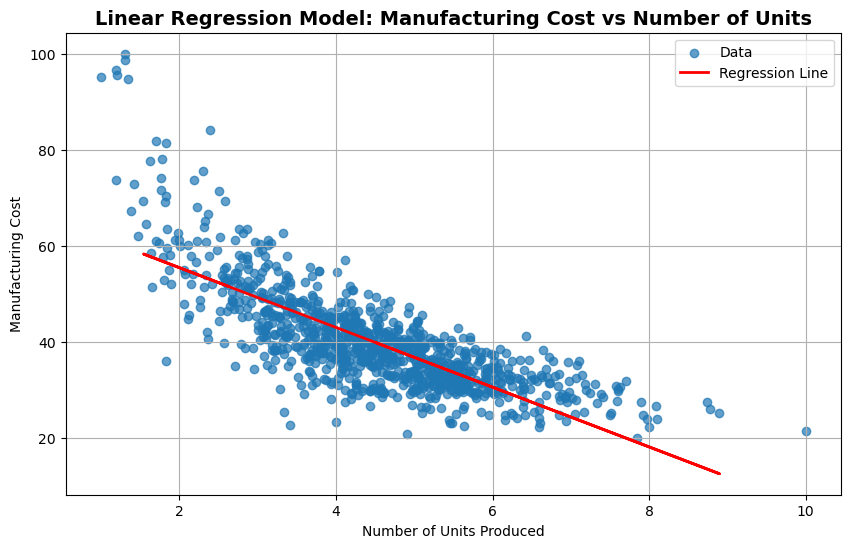

In [5]:
# Develop and Evaluate the Model - Linear Regression
X = df[['Number_of_Units']]
y = df['Manufacturing_Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining and Test Set Sizes:")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print("\nLinear Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-Squared (R²):", r2_score(y_test, y_pred))

# Visualize the Model - Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression Model: Manufacturing Cost vs Number of Units', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation

- **Model Fit**: The model seems to explain some of the relationship between the number of units produced and manufacturing cost, but there's still a fair amount of unexplained variability.
- **Accuracy**: The MAE of 4.51 and MSE of 35.20 suggest that the model is performing reasonably well for a linear regression, but it’s not perfect. There's room for improvement, especially in reducing larger errors (as suggested by the MSE).
- **Room for Improvement**: The R² value of 0.57 indicates that 43% of the variance is unexplained. 

#### **2. Economies of Scale - Checking cost per unit**

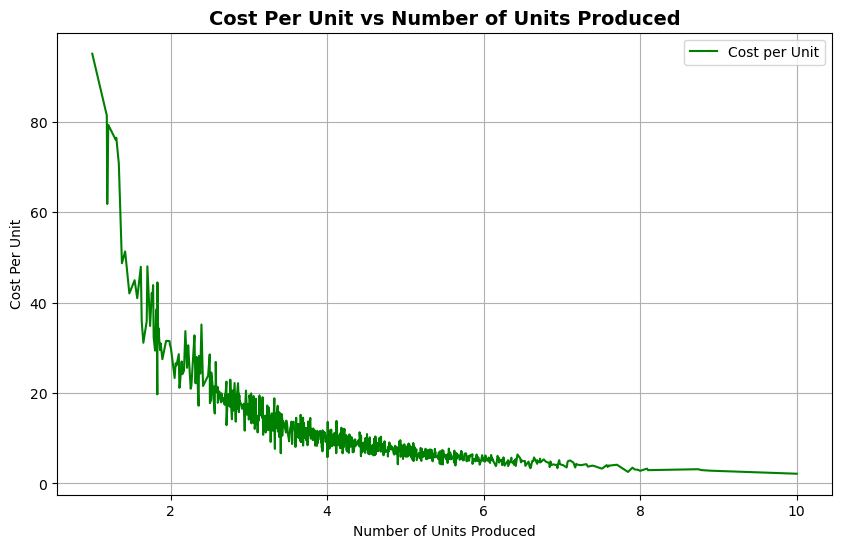

In [6]:
df['Cost_Per_Unit'] = df['Manufacturing_Cost'] / df['Number_of_Units']

# Visualize the Cost per Unit trend
plt.figure(figsize=(10, 6))
plt.plot(df['Number_of_Units'], df['Cost_Per_Unit'], color='green', label='Cost per Unit')
plt.title('Cost Per Unit vs Number of Units Produced', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Cost Per Unit')
plt.grid(True)
plt.legend()
plt.show()

#### **3. Diminishing Returns - Check if the cost increases at an accelerating rate**

**Residual Plot** shows the residuals (the differences between actual and predicted values) created for the linear model. This inspects whether there are any patterns in the residuals. Ideally, residuals should be randomly scattered with no clear pattern. Patterns might indicate that the model is underfitting or that another model might be more appropriate.

**Q-Q Plot: A Q-Q plot of the residuals is generated to check for normality.** This is used to assess whether the residuals follow a normal distribution. This assumption is important for certain statistical models and can indicate if the model is appropriately fitted.

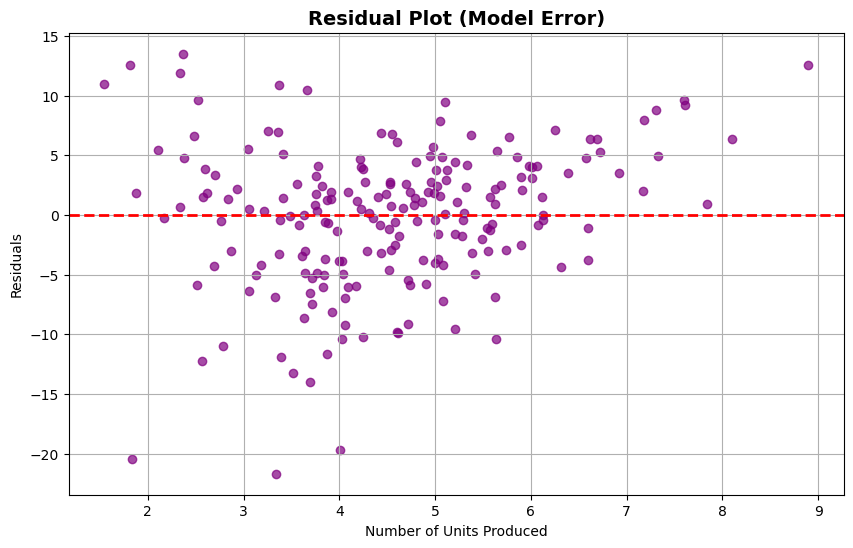

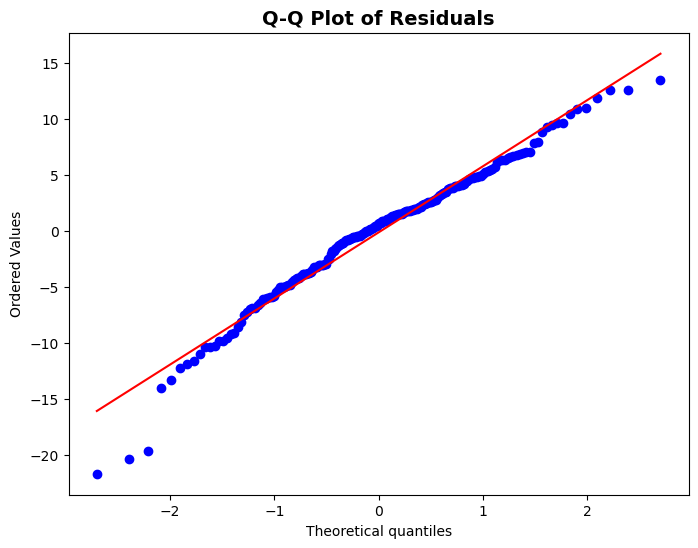

In [7]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot (Model Error)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Check the normality of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=14, fontweight='bold')
plt.show()

#### **4. Polynomial Regression (if a non-linear relationship exists)**

Let's compare the performance of the polynomial model with the linear model. A better-performing model would have a lower MAE and MSE, and a higher R².


Polynomial Model Evaluation Metrics:
Mean Absolute Error (MAE): 4.372292708304973
Mean Squared Error (MSE): 33.22656710889019
R-Squared (R²): 0.5936898412489064


C:\Users\milto\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


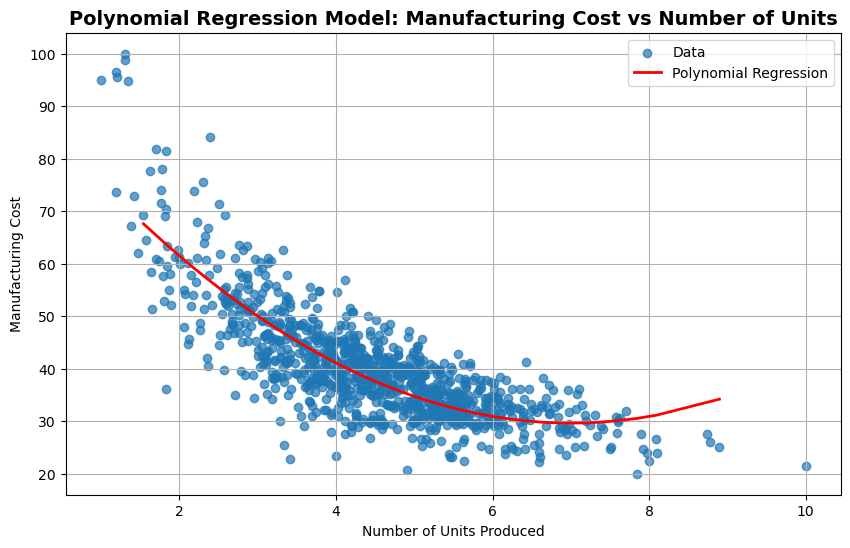

In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_model = make_pipeline(poly, LinearRegression())

# Train the polynomial regression model
poly_model.fit(X_train, y_train)

# Predict and evaluate
poly_y_pred = poly_model.predict(X_test)

print("\nPolynomial Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, poly_y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, poly_y_pred))
print("R-Squared (R²):", r2_score(y_test, poly_y_pred))

# Plot polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(
    sorted(X_test.values.flatten()), 
    poly_model.predict(sorted(X_test.values.reshape(-1, 1))), 
    color='red', label='Polynomial Regression', linewidth=2
)
plt.title('Polynomial Regression Model: Manufacturing Cost vs Number of Units', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation

- The average absolute error between the predicted and actual manufacturing costs is 4.37 units. This means that, on average, the model's predictions are off by 4.37 units of manufacturing cost.
- The MSE of 33.23 indicates that, on average, the squared differences between predicted and actual values are this amount. This metric tends to penalize larger errors more than MAE.
- The R² value of 0.59 means that the polynomial model explains about 59% of the variance in the manufacturing cost based on the number of units produced.

#### **5. Variability in Manufacturing Cost**

C:\Users\milto\AppData\Local\Temp\ipykernel_21372\3248574235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Number_of_Units', y='Manufacturing_Cost', data=df, palette='Blues')


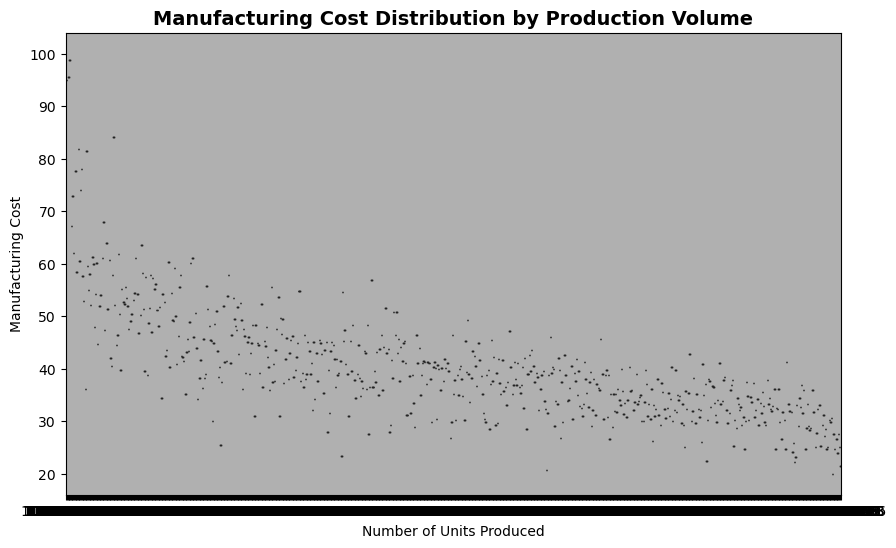

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number_of_Units', y='Manufacturing_Cost', data=df, palette='Blues')
plt.title('Manufacturing Cost Distribution by Production Volume', fontsize=14, fontweight='bold')
plt.xlabel('Number of Units Produced')
plt.ylabel('Manufacturing Cost')
plt.grid(True)
plt.show()

#### **6. Outliers or anomalies in the data**

The code attempts to detect outliers in the dataset, although in this case, no outliers are found. The purpose is to ensure that no extreme or erroneous data points are unduly influencing the model's performance.

In [11]:
z_scores = np.abs(stats.zscore(df[['Number_of_Units', 'Manufacturing_Cost']]))
outliers = (z_scores > 3).all(axis=1)
outliers_data = df[outliers]
print("\nOutliers detected:")
print(outliers_data)


Outliers detected:
Empty DataFrame
Columns: [Number_of_Units, Manufacturing_Cost, Cost_Per_Unit]
Index: []


### Interpretation

- The message indicates that no outliers were detected in your data based on the current analysis. The empty DataFrame result:

- This suggests that the data doesn't contain extreme outliers that would disproportionately influence the model. This is good because outliers can sometimes skew model performance, but in this case, they do not appear to be an issue.

#### **7. Predict Manufacturing Costs for Extreme Values (e.g., low or high production volumes)**

This code makes predictions for 0 units and 1000 units using the model. The purpose is to check how the model performs at extreme values (near the boundaries of the data). This helps understand how the model behaves when extrapolating beyond the training data.

In [12]:
# Predict cost for 0 units and 1000 units using the linear model
extreme_values = np.array([[0], [1000]])
predicted_costs = model.predict(extreme_values)
print(f"\nPredicted Manufacturing Costs for 0 and 1000 units:")
print(f"Cost for 0 units: {predicted_costs[0]}")
print(f"Cost for 1000 units: {predicted_costs[1]}")


Predicted Manufacturing Costs for 0 and 1000 units:
Cost for 0 units: 67.89012908512078
Cost for 1000 units: -6150.616849274355


C:\Users\milto\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Key Findings

- The model predicts that the manufacturing cost for 0 units produced would be 67.89 units of cost. While this seems like an arbitrary number, it reflects the model's behavior when extrapolating to extreme values (e.g., zero units produced).
- While a manufacturing cost of 67.89 for 0 units might not be directly meaningful, it suggests that the model has a non-zero baseline cost, possibly reflecting fixed costs or overhead. This could be useful in situations where you still need to account for fixed operational costs (e.g., facility costs) even if no units are produced.
- The model predicts a negative manufacturing cost for 1000 units, which is not realistic in a real-world scenario. Negative costs would imply that you are somehow making money or generating profit from producing these units, which doesn't make sense in the context of manufacturing cost.
- This suggests that the polynomial model may not generalize well at extreme values (like 0 and 1000 units). When extrapolating beyond the range of the training data, the polynomial regression model can sometimes produce unreasonable predictions, such as negative costs. 

### Suggestions for Improvement

- **Address extrapolation issues**: Consider using a model that doesn't exhibit extreme behavior when extrapolating beyond the data range.
- **Feature engineering**: Include additional features or constraints to improve the model’s ability to capture the true relationship between units produced and manufacturing costs.
- **Regularization**: Add regularization to prevent the polynomial model from overfitting and producing unreasonable predictions at extreme values.

## Conclusion

- The data reveals that most production volumes are relatively low, with an average of approximately 4.47 units produced per observation.

- Both the linear and polynomial regression models provide useful insights into the relationship between production volume and manufacturing costs, but they are far from perfect. The linear model serves as a good baseline, while the polynomial model offers slight improvements but still exhibits limitations, especially when extrapolating to extreme values. 

- The models capture a reasonable amount of variance in the data, but there is room for improvement, particularly in accounting for fixed costs, non-linear relationships, and more complex factors affecting manufacturing costs.